# FIFA World Cup 2022


## Introduction

Source: [Player data](https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data?select=player_stats.csv) <br>
[Team data](https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics?select=team_data.csv)

## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
team = pd.read_csv('data/team_data.csv')
player = pd.read_csv('data/player_stats.csv')

In [3]:
team.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [4]:
team.isnull().sum().all()

False

In [5]:
team['goals/shots_on_target'] = team['goals_per90'].div(team['shots_on_target_per90'])
team.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,goals/shots_on_target
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,115,23,5,2,1,357,83,90,48.0,0.366355
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,34,1,0,0,0,200,72,72,50.0,0.375000
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,35,3,0,1,0,132,33,28,54.1,0.110000
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,74,8,1,0,0,271,43,56,43.4,0.200000
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,38,2,0,0,0,142,42,36,53.8,0.249531


Text(0, 0.5, 'Team')

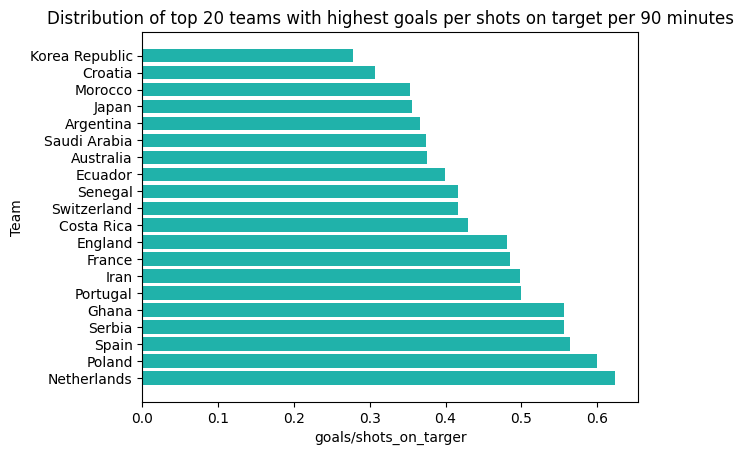

In [6]:
plt.barh(y='team',width='goals/shots_on_target',data = team.sort_values('goals/shots_on_target',ascending=False).head(20),color = 'lightseagreen')
plt.title('Distribution of top 20 teams with highest goals per shots on target per 90 minutes')
plt.xlabel('goals/shots_on_targer')
plt.ylabel('Team')

Text(0.5, 1.0, 'Goals vs xG(expected goals) per 90 mins')

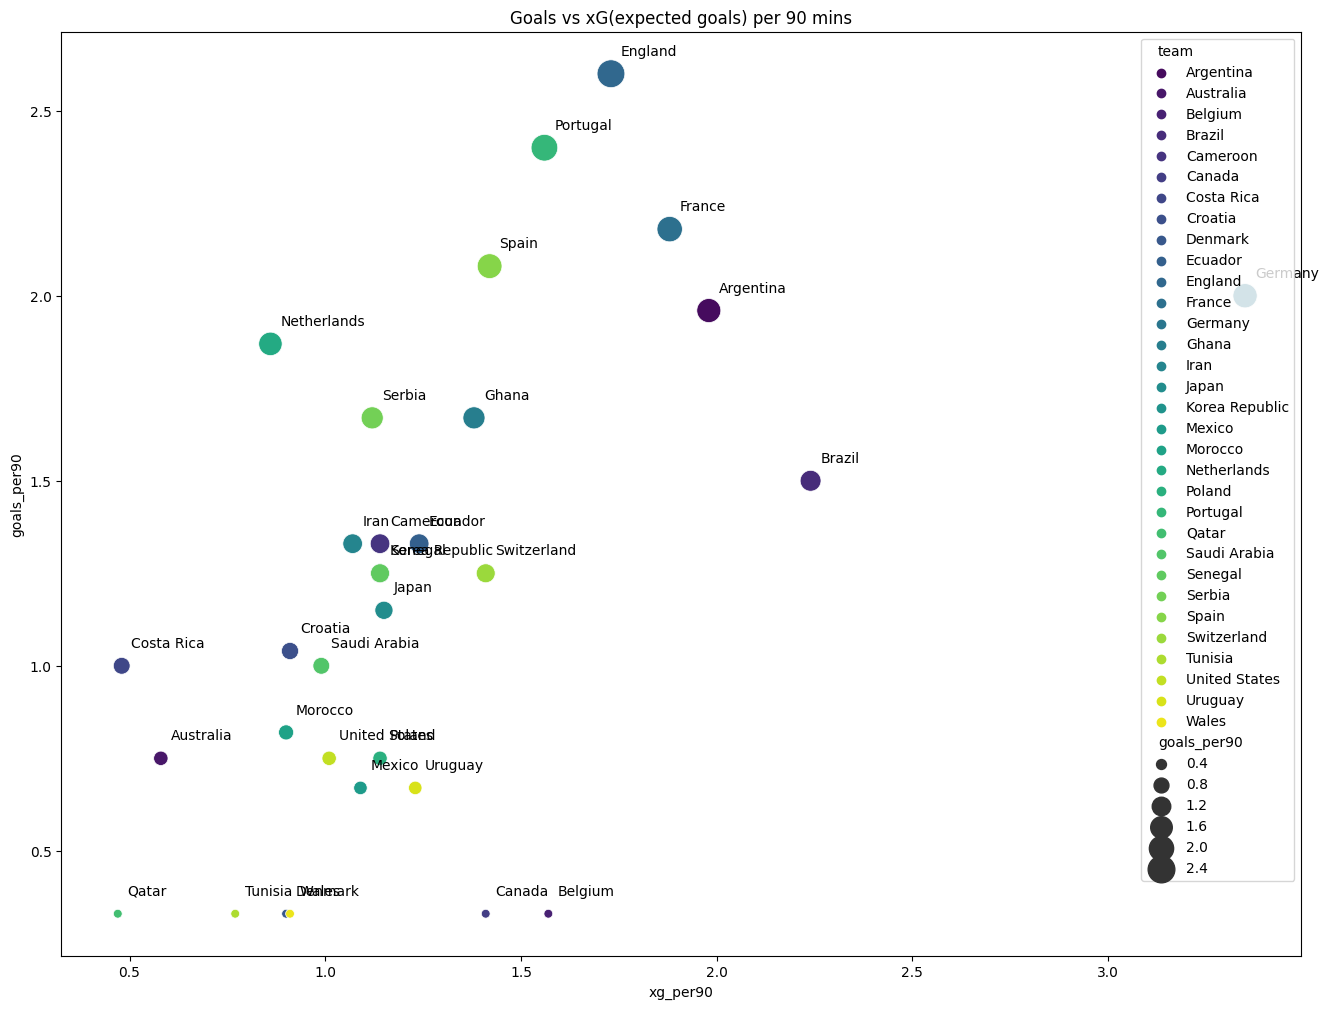

In [7]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=team,y='goals_per90',x='xg_per90',hue='team',size='goals_per90',palette = 'viridis',sizes = (40,400))
for i in range(team.shape[0]):
 plt.text(x=team['xg_per90'][i]+0.025,y=team['goals_per90'][i]+0.05,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.title('Goals vs xG(expected goals) per 90 mins')

Text(0.5, 1.0, 'Number of players used')

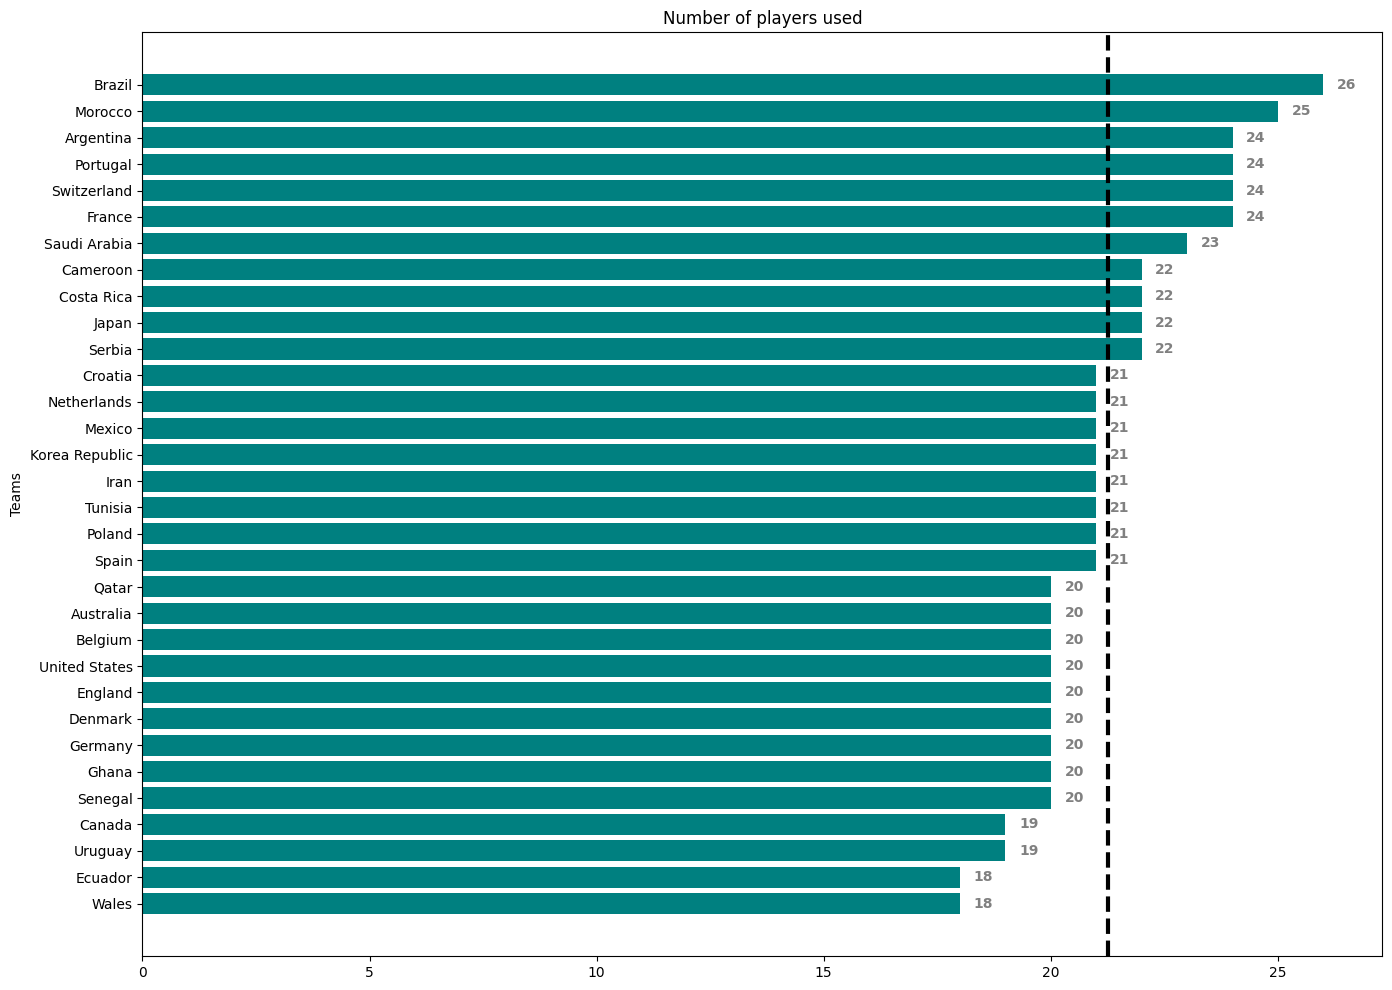

In [8]:
fig, ax = plt.subplots(figsize=(16,12))
ax.barh('team',width = 'players_used',data = team.sort_values('players_used',ascending=True),color = 'teal')
for i in ax.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
avg_players_used = np.mean(team['players_used'])
ax.axvline(x=avg_players_used,linestyle='--',color='black',linewidth = 3)
ax.set_ylabel('Teams')
ax.set_title('Number of players used')

## Fair Play


Text(0.5, 0, 'Team')

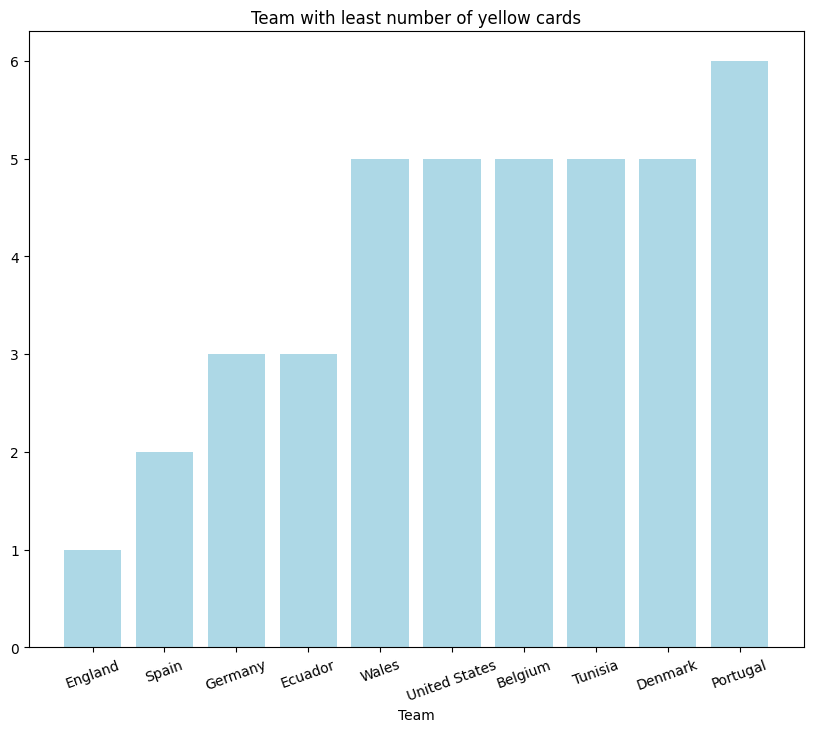

In [9]:
plt.figure(figsize=(10,8))
plt.bar(x='team',height='cards_yellow',data=team.sort_values('cards_yellow',ascending=True).head(10),color='lightblue')
plt.xticks(rotation = 20)
plt.title('Team with least number of yellow cards')
plt.xlabel('Team')

## Passes Allowed per Defensive Action (PPDA)

Source: [Defensive metric](https://statsbomb.com/articles/soccer/defensive-metrics-measuring-the-intensity-of-a-high-press) <br>
 __PPDA = Number of Passes (opponent)/Number of Defensive Actions__ <br>
Based on Colin Trainor, Defensive Actions consist of: <br>
- Tackles <br>
- Interceptions <br>
- Failed tackled <br>
- Fouls <br>
A smaller PPDA ratio indicates a higher defensive intensity 

Text(0.5, 1.0, 'Distribution of PPDA among teams')

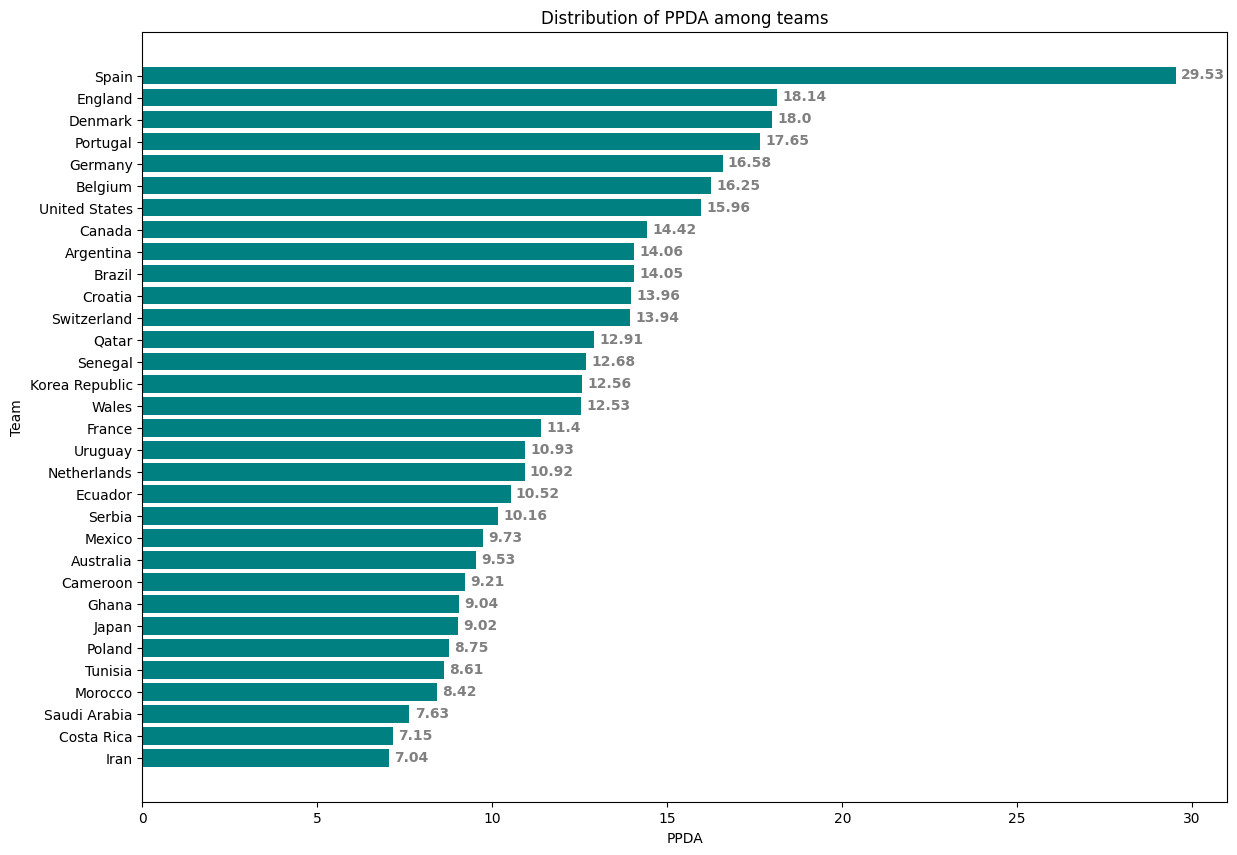

In [10]:
team['def_actions'] = team['tackles'] + team['interceptions'] + team['tackles'].subtract(team['tackles_won']) + team['fouls']
team['ppda'] = round(team['passes'].div(team['def_actions']),2)

fig, ax = plt.subplots(figsize=(14,10))
ax.barh('team',width = 'ppda',data = team.sort_values('ppda',ascending=True),color = 'teal')
for i in ax.patches:
    plt.text(i.get_width()+0.15, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
#avg_players_used = np.mean(team['players_used'])
#ax.axvline(x=avg_players_used,linestyle='--',color='black',linewidth = 3)
ax.set_ylabel('Team')
ax.set_xlabel('PPDA')
ax.set_title('Distribution of PPDA among teams')


Spain yielded the highest ball possession (75.8 minutes) but only scored slightly above mean goals of all teams. <br>
France possessed the ball for average 51.3 minutes but scored surprisingly high number of goals, 16. 

5.3125

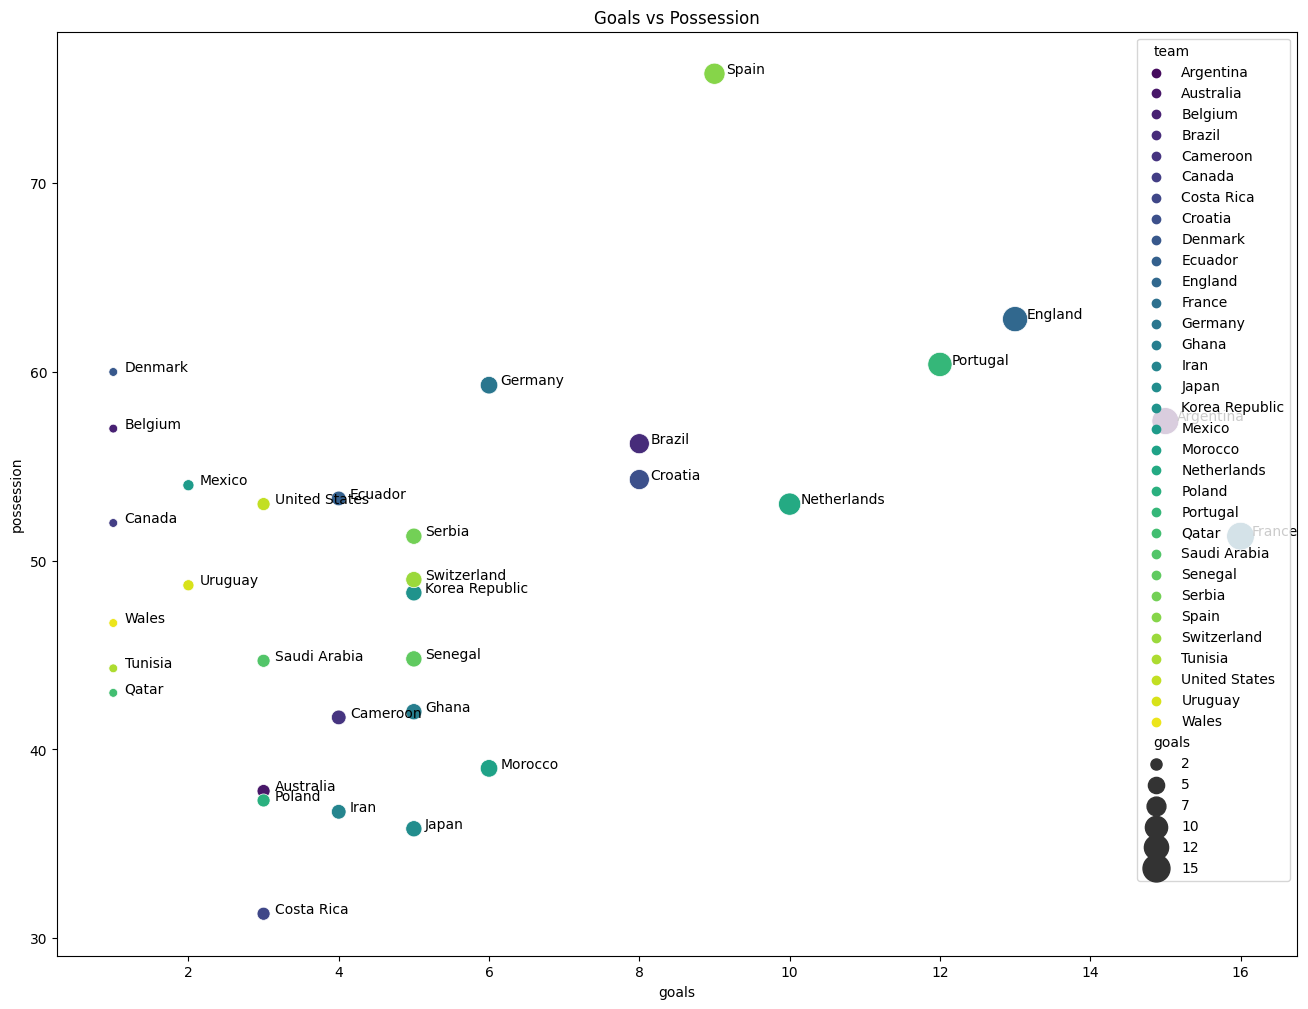

In [11]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=team,y='possession',x='goals',hue='team',size='goals',palette = 'viridis',sizes = (40,400))
for i in range(team.shape[0]):
 plt.text(x=team['goals'][i]+0.15,y=team['possession'][i]+0.025,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.title('Goals vs Possession')

np.mean( team['goals'])

In [31]:
import plotly.express as px
fig = px.treemap(team, path = ['team'], values = 'possession',color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(team['possession'], weights=team['possession']),title = 'Average ball possession among teams')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()

In [12]:
team.loc[:,['games','passes_completed']].head()


,games,passes_completed
0,7,3911
1,4,1254
2,3,1598
3,5,2750
4,3,960


In [13]:
team['passes_completed_per_game'] = round(team['passes_completed'].div(team['games']))
team.loc[:,['team','passes_completed_per_game',]].head(20)

,team,passes_completed_per_game
0,Argentina,559.0
1,Australia,314.0
2,Belgium,533.0
3,Brazil,550.0
4,Cameroon,320.0
5,Canada,436.0
6,Costa Rica,274.0
7,Croatia,538.0
8,Denmark,533.0
9,Ecuador,384.0


Text(9.444444444444452, 0.5, 'Passes into final third zone')

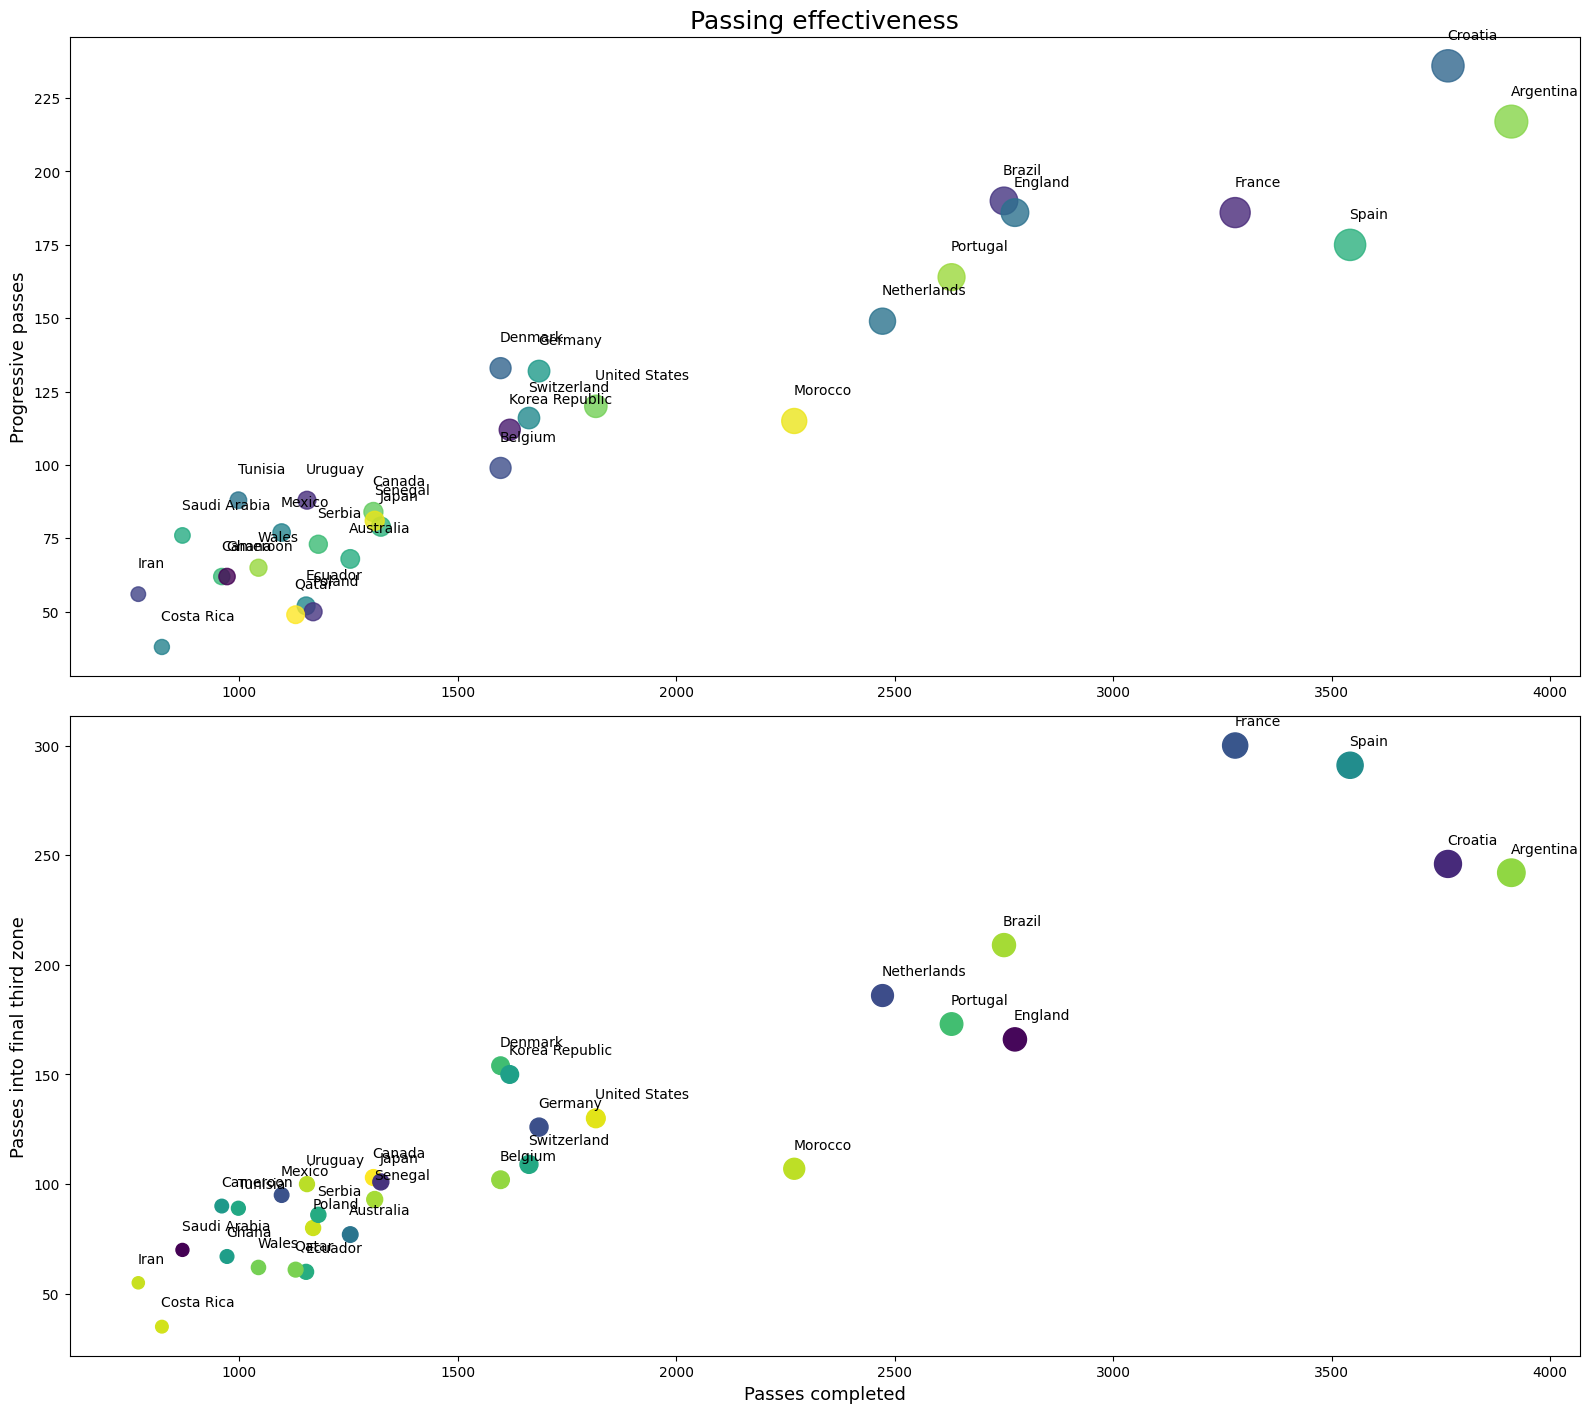

In [99]:
fig,axes = plt.subplots(2,1,figsize=(16,14))
axes[0].set_title('Passing effectiveness',size = 18)

axes[0].scatter(data=team,y='progressive_passes',x='passes_completed',s=team['passes_completed'].div(7),c = np.random.rand(team.shape[0]),alpha=0.8)
for i in range(team.shape[0]):
 axes[0].text(x=team['passes_completed'][i]-2,y=team['progressive_passes'][i]+9,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.tight_layout()
axes[0].set_ylabel('Progressive passes',size =13)

axes[1].scatter(data=team,y='passes_into_final_third',x='passes_completed',s=team['passes_completed'].div(10),c = np.random.rand(team.shape[0]))
for i in range(team.shape[0]):
 axes[1].text(x=team['passes_completed'][i]-2,y=team['passes_into_final_third'][i]+9,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.tight_layout()
axes[1].set_xlabel('Passes completed',size =13)
axes[1].set_ylabel('Passes into final third zone',size =13)
